## COMP-3703 Intro to Artificial Intelligence Assignment 4

Name: Qichun Yu

### Question 1

a) Import librosa, librosa feature, and librosa display

In [1]:
# install librosa
# pip install librosa

In [2]:
import librosa
import librosa.feature
import librosa.display

b) Import glob, numpy, and matplotlib.pyplot

In [3]:
import glob
import numpy as np
import matplotlib.pyplot as plt

c) Import Keras as required.

In [4]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.utils.np_utils import to_categorical

Using TensorFlow backend.
C:\Users\jacks\anaconda3\envs\UL\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\jacks\anaconda3\envs\UL\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\jacks\anaconda3\envs\UL\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\jacks\anaconda3\envs\UL\lib\site-packages\tenso

### Question 2 Use the following code snippet to display MFCC’s

In [5]:
def display_mfcc(song):
    y, _ = librosa.load(song)
    mfcc = librosa.feature.mfcc(y)

    plt.figure(figsize=(10, 4))
    librosa.display.specshow(mfcc, x_axis='time', y_axis='mel')
    plt.colorbar()
    plt.title(song)
    plt.tight_layout()
    plt.show()

a) Display ‘kick-loop.wave’ from the site indicated in class.

C:\Users\jacks\anaconda3\envs\UL\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Pass y=[ 1.5840789e-03 -6.1110809e-04 -6.9284895e-03 ...  2.3253827e-08
 -2.0244789e-08  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  This is separate from the ipykernel package so we can avoid doing imports until


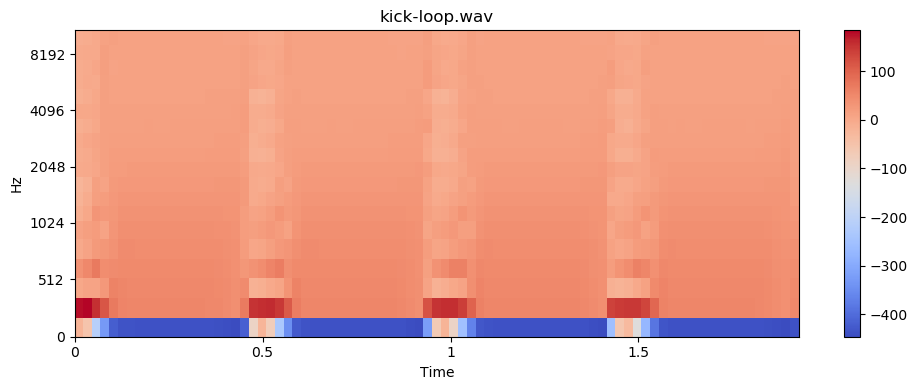

In [6]:
# using display_mfcc to display 'kick-loop.wave'
display_mfcc('kick-loop.wav')

b) Display ‘whistling.wav’ from the site indicated in class.

C:\Users\jacks\anaconda3\envs\UL\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Pass y=[0.00013847 0.0001462  0.00016552 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  This is separate from the ipykernel package so we can avoid doing imports until


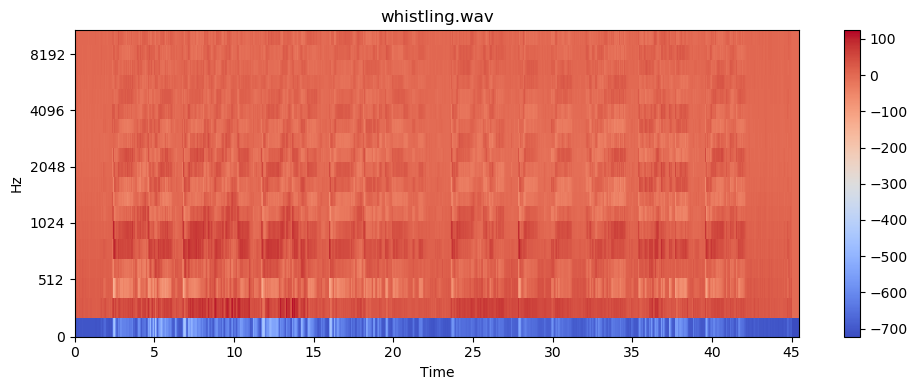

In [7]:
display_mfcc('whistling.wav')

c) Display 2 different examples from the GTZAN data set. Consult the notes for clarification.

**Disco Example**

C:\Users\jacks\anaconda3\envs\UL\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Pass y=[-0.06051636 -0.06201172 -0.03417969 ... -0.01367188 -0.06228638
 -0.06088257] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  This is separate from the ipykernel package so we can avoid doing imports until


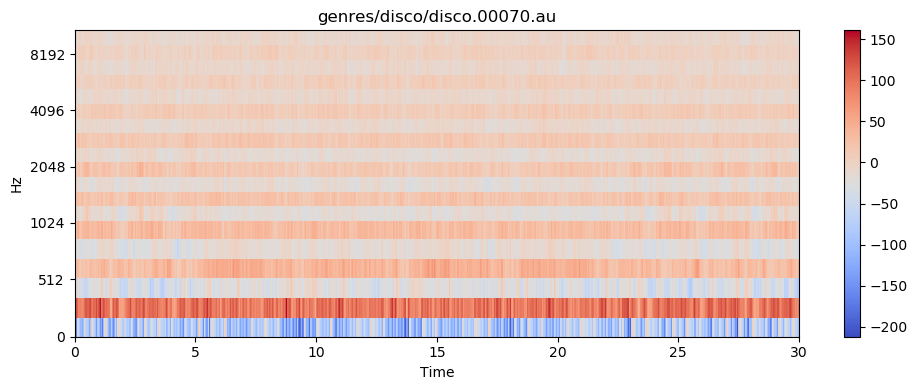

In [8]:
display_mfcc('genres/disco/disco.00070.au')

**Classical Example**

C:\Users\jacks\anaconda3\envs\UL\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Pass y=[-0.00109863 -0.0010376  -0.00109863 ... -0.04022217 -0.01620483
  0.00531006] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  This is separate from the ipykernel package so we can avoid doing imports until


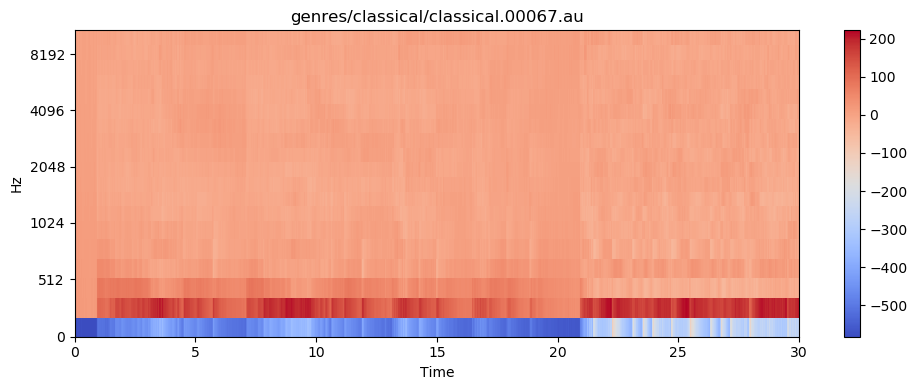

In [9]:
display_mfcc('genres/classical/classical.00067.au')

### Question 3 (Data Preparation) Use the code snippets to help prepare your data.

a) Explain the operation of this auxiliary function.

In [10]:
def extract_features_song(f):
    y, _ = librosa.load(f)

    # get Mel-frequency cepstral coefficients
    mfcc = librosa.feature.mfcc(y)
    # normalize values between -1,1 (divide by max)
    mfcc /= np.amax(np.absolute(mfcc))

    return np.ndarray.flatten(mfcc)[:25000]

The function allows a file name(f) as input. We use the load function from librosa to load the audio file as a floating point time series. We store the audio time series as variable 'y' from the load function. After that, the mfcc function from librosa.feature helps us to get Mel-frequency cepstral coefficients (MFCCs) from the audio time series ('y' variable). Since we want the value to be normalized between -1 to 1 for the neural network model. We use amax from the NumPy library to find the absolute value of MFCCs. Then we divide all the MFCCs values by that max. The flatten function from NumPy.ndarray help us to collapse the array into one dimension. In the end, the extract_features_song function returns a one dimension mfcc array with the first 25,000 MFCC values. 

b) Explain the operation of the following code snippet. Use it in your worksheet.

First, we create two empty lists to store all the features and labels. The genres variable stores all the genres available in the files. Next, we use a for loop to go through all the different genres in all the sound files. The glob function from glob returns a list of paths matching the pathname pattern of 'genres/'+genre+'/*.au'. We print out how many songs have been processing and the genre name. We can see from the output of the function there are 100 songs in each sound file. For each sound file, we apply the extract_features_song function that we created before to find the feature of the song. The features will store in the all_features list and the respective genre will store in the all_labels as the label of the song. 

c) Convert your labels to a One-Hot Encoding. The output should look something like what follows.

In [11]:
def generate_features_and_labels():
    all_features = []
    all_labels = []

    genres = ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']
    for genre in genres:
        sound_files = glob.glob('genres/'+genre+'/*.au')
        print('Processing %d songs in %s genre...' % (len(sound_files), genre))
        for f in sound_files:
            features = extract_features_song(f)
            all_features.append(features)
            all_labels.append(genre)
            
    # c) convert labels to a One-Hot Encoding
    label_uniq_ids, label_row_ids = np.unique(all_labels, return_inverse=True)
    label_row_ids = label_row_ids.astype(np.int32, copy=False)
    onehot_labels = to_categorical(label_row_ids, len(label_uniq_ids))
    return np.stack(all_features), onehot_labels

In [12]:
# ignore warnings messages
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# store featues and labels into variables from the function
features, labels = generate_features_and_labels()

Processing 100 songs in blues genre...
Processing 100 songs in classical genre...
Processing 100 songs in country genre...
Processing 100 songs in disco genre...
Processing 100 songs in hiphop genre...
Processing 100 songs in jazz genre...
Processing 100 songs in metal genre...
Processing 100 songs in pop genre...
Processing 100 songs in reggae genre...
Processing 100 songs in rock genre...


d) Print out the shape of the Features and labels sets you have.

In [13]:
print("The shape of the features sets is", np.shape(features))
print("The shape of the labels sets is", np.shape(labels))

The shape of the features sets is (1000, 25000)
The shape of the labels sets is (1000, 10)


### Question 4 (Training and Testing Splits)

a) Using a 0.8 training split, construct your training and testing sets as explained in class.

In [14]:
# set training split equal to 0.8
training_split = 0.8

In [15]:
# using column_stack from numpy to turn last genre column into unique ids

alldata = np.column_stack((features, labels))

In [16]:
# Shuffle alldata and create training and testing splits
np.random.shuffle(alldata)
splitidx = int(len(alldata) * training_split)

# first 80% of data as training set, last 20% of data as testing set
train, test = alldata[:splitidx,:], alldata[splitidx:,:]

b) Output/print the shape of the following:<br>

    I. Initial training and testing sets
    II. Training input and training labels

In [17]:
# print out the shape of initial training sets
print("The shape of the initial training sets:", train.shape)

The shape of the initial training sets: (800, 25010)


In [18]:
# print out the shape of initial testing sets
print("The shape of the initial testing sets:", test.shape)

The shape of the initial testing sets: (200, 25010)


In [19]:
train_input = train[:,:-10]     # strip last 10
train_labels = train[:,-10:]    # 10 columns to the end

test_input = test[:,:-10]       # strip last 10
test_labels = test[:,-10:]      # 10 columns to the end

# print out the shape of training input
print(np.shape(train_input))
# print out the shape of training labels
print(np.shape(train_labels))

(800, 25000)
(800, 10)


### Question 5 (Neural Net)

a) Construct the Neural Net as indicated in class.

In [20]:
# create sequential NN
model = Sequential()
# add first layer is 100 Dense, give the input dimension/shape(25,000)
model.add(Dense(100, input_dim=train_input.shape[1]))
# add relu activation function
model.add(Activation('relu'))
# add second layer with 10 neuron output layer
model.add(Dense(10))
# Add Softmax(probablistic) as activation function in layer 2
model.add(Activation('softmax'))

Instructions for updating:
Colocations handled automatically by placer.


b) Compile the Neural Net indicated in class and print the model summary. 

In [21]:
# Compile the Neural Net Model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [22]:
# print the model summary
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               2500100   
_________________________________________________________________
activation_1 (Activation)    (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
_________________________________________________________________
activation_2 (Activation)    (None, 10)                0         
Total params: 2,501,110
Trainable params: 2,501,110
Non-trainable params: 0
_________________________________________________________________


c) Fit the Neural Net with the training input and training labels, use 10 epochs, batch size of 32, and a validation split of 0.2.

In [23]:
model.fit(train_input, train_labels, epochs=10, batch_size=32, validation_split=0.2)

Instructions for updating:
Use tf.cast instead.
Train on 640 samples, validate on 160 samples
Epoch 1/10
640/640 [==============================] - 1s 1ms/step - loss: 2.2038 - acc: 0.2812 - val_loss: 1.9288 - val_acc: 0.2750
Epoch 2/10
640/640 [==============================] - 0s 762us/step - loss: 1.4526 - acc: 0.4828 - val_loss: 1.6361 - val_acc: 0.4313
Epoch 3/10
640/640 [==============================] - 0s 764us/step - loss: 1.1253 - acc: 0.6500 - val_loss: 1.5626 - val_acc: 0.4437
Epoch 4/10
640/640 [==============================] - 0s 759us/step - loss: 0.9122 - acc: 0.7359 - val_loss: 1.4140 - val_acc: 0.5062
Epoch 5/10
640/640 [==============================] - 0s 734us/step - loss: 0.7146 - acc: 0.8281 - val_loss: 1.4723 - val_acc: 0.4813
Epoch 6/10
640/640 [==============================] - 0s 757us/step - loss: 0.5664 - acc: 0.8719 - val_loss: 1.4294 - val_acc: 0.5062
Epoch 7/10
640/640 [==============================] - 0s 737us/step - loss: 0.4699 - acc: 0.8953 - val_l

d) Using model.evaluate, print out the loss and accuracy. Print out the final loss and accuracy.
Your output should look as follows.

In [24]:
# store loss and accuracy from model.evaluate
loss, accuracy = model.evaluate(test_input, test_labels, batch_size=32)
print(f"Done!\nLoss: {loss:.4f}, accuracy: {accuracy:.4f}")

200/200 [==============================] - 0s 102us/step
Done!
Loss: 1.4199, accuracy: 0.5400


### Question 6 (The next questions are related to the improved spam detector

a) Import:<br>

    i. Pandas, Numpy
    ii. Keras, Keras.preprocessing.text, tokenizer, models, sequential, layers, dense, dropout, activation, utils, np_utils
    iii. Sklearn model selection, StratifiedKFold.

In [25]:
import pandas as pd
import numpy as np
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.utils import np_utils
from sklearn.model_selection import StratifiedKFold

### Question 7 (Data and data prep.)

a) Load and stack the datafiles the Youtube comment data files. name this ‘d’. Shuffle using frac=1.

In [26]:
# load and concatenate all 5 comment files
data = pd.concat(map(pd.read_csv, ['Youtube01-Psy.csv', 
                                   'Youtube02-KatyPerry.csv', 
                                   'Youtube03-LMFAO.csv',
                                   'Youtube04-Eminem.csv',
                                   'Youtube05-Shakira.csv']))

In [27]:
# shuffle data using frac=1
d = data.sample(frac=1)

In [28]:
d.head()

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
169,z12gwzbqipbzyt0dg232zfya0qzpudm0e,Vathanarajah Kunarajah,2015-05-17T19:36:36.955000,Check out this video on YouTube:﻿,1
197,z123gh5o1pibgntf222einrisrfasnha104,Romeo Sweeney,2014-11-07T13:33:12,this has so many views﻿,0
314,LneaDw26bFusJ2z8NldBy-Z5iwzOQ6CPi1ryYyOhzD4,Drake Gagne,NaN,Hey guys ready for more 87 Cyphers back check ...,1
44,z13stv3brxe1snv2i225fnvganneudej004,MFkin PRXPHETZ,2014-01-20T09:08:39,"if you like raw talent, raw lyrics, straight r...",1
301,z13gdxtwjrjoczd5h04cejcqqpedxxoyn34,Aleesha Hoover,2015-05-22T14:44:13.619000,Love the video ﻿,0


b) Explain the following code snippets for creating the splits. 

In [29]:
kfold = StratifiedKFold(n_splits=5)
splits = kfold.split(d, d['CLASS'])

i. Explain what StratifiedKFold does.

The StratifiedKFold function is a Stratified K-Folds cross-validator that split the dataset into five stratified folds (when n_splits=5). Split into five folds means we can cross-validate with 80% of data as training and 20% of data as testing. The split function returns the indices to split data into training and testing (sklearn.model_selection.KFold, n.d.). The split function allows the X parameter and y parameter. The X parameter is the training data; in our case, the X is the d dataset. The y parameter is the target variable or label; in our case, the y is the class column from the d dataset. 

**Reference**<br>
sklearn.model_selection.KFold. (n.d.). Scikit-learn. https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html

ii. what is d[‘CLASS’] ?

The d[‘CLASS’] is the class column from the d dataset. In the class column, there are only 0 and 1, where 1 means spam comment and 0 means non-spam comment. 

c) Create a loop to print out the test in splits.

In [30]:
for train, test in splits:
    print("Split")
    print(test)

Split
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 

### Question 8 & Question 9 (The NN)

8a) Explain the function of the following code.

The function takes the indexes of training and testing for the different splits. we use the iloc function to locate the content from the d dataset. The tokenizer class vectorizes a text corpus to change the text into a sequence of integers or a vector. The num_words specify the maximum number of words to keep. The fit_on_texts function learns the training words by updating internal vocabulary based on the training content. The texts_to_matrix function converts a list of texts to a NumPy matrix. The tfidf mode scores the text between 0 and a random integer. Because we want to scale down the numbers between 0 and 1. We divide the tfidf value by the max of the absolute of tfidf values. The next step is to subtract by the mean so we can get values between -1 and 1.

**Reference**<br>
tf.keras.preprocessing.text.Tokenizer  |  TensorFlow v2.10.1. (n.d.). TensorFlow. https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/text/Tokenizer

In [31]:
def train_and_test(train_idx, test_idx):
    
    train_content = d['CONTENT'].iloc[train_idx]
    test_content = d['CONTENT'].iloc[test_idx]
    
    tokenizer = Tokenizer(num_words=2000)
    
    # learn the training words (not the testing words!)
    tokenizer.fit_on_texts(train_content)

    # options for mode: binary, freq, tfidf
    d_train_inputs = tokenizer.texts_to_matrix(train_content, mode='tfidf')
    d_test_inputs = tokenizer.texts_to_matrix(test_content, mode='tfidf')

    # divide tfidf by max
    d_train_inputs = d_train_inputs/np.amax(np.absolute(d_train_inputs))
    d_test_inputs = d_test_inputs/np.amax(np.absolute(d_test_inputs))

    # subtract mean, to get values between -1 and 1
    d_train_inputs = d_train_inputs - np.mean(d_train_inputs)
    d_test_inputs = d_test_inputs - np.mean(d_test_inputs)

    # 8b)one-hot encoding of outputs
    d_train_outputs = np_utils.to_categorical(d['CLASS'].iloc[train_idx])
    d_test_outputs = np_utils.to_categorical(d['CLASS'].iloc[test_idx])

    # 9a) Build the Neural Network as described in class.
    # create model Sequential
    model = Sequential()
    # Add a 512 dense input layer with shape 2000(BOW size)
    model.add(Dense(512, input_shape=(2000,)))
    # add 'relu' activition function
    model.add(Activation('relu'))
    # add dropout of 0.5 to prevent overfitting
    model.add(Dropout(0.5))
    # add last layer with 2 neurons
    model.add(Dense(2))
    # add softmax activation function
    model.add(Activation('softmax'))

    # 9b) Compile with categorical_crossentropy, adamax optimizer, and the accuracy metric.
    model.compile(loss='categorical_crossentropy', optimizer='adamax', metrics=['accuracy'])
    
    # 9c) Fit with the training inputs and training outputs with 10 epochs, and a batch size of 16.
    model.fit(d_train_inputs, d_train_outputs, epochs=10, batch_size=16)

    # 9d) Score the model on the test inputs and outputs using the following code snippet.
    scores = model.evaluate(d_test_inputs, d_test_outputs)
    print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    return scores

9d) Explain the code snippet’s function

We use the evaluate function to evaluate the performance of the neural network model. We pass in with the inputs and outputs data from the testing set. The function print the metrics name (accuracy) and the accuracy score. The accuracy score times 100 so we can get a percent to show. The .2f%% means to show the percentage with two decimal places.  

9e) Using the following code build the split again using the following code. Explain this code snippet’s function

In [32]:
kfold = StratifiedKFold(n_splits=5)
splits = kfold.split(d, d['CLASS'])
cvscores = []
for train_idx, test_idx, in splits:
    scores = train_and_test(train_idx, test_idx)
    cvscores.append(scores[1] * 100)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Epoch 1/10
1564/1564 [==============================] - 1s 648us/step - loss: 0.5871 - acc: 0.8075
Epoch 2/10
1564/1564 [==============================] - 1s 544us/step - loss: 0.3541 - acc: 0.9207
Epoch 3/10
1564/1564 [==============================] - 1s 516us/step - loss: 0.2228 - acc: 0.9444
Epoch 4/10
1564/1564 [==============================] - 1s 521us/step - loss: 0.1719 - acc: 0.9572
Epoch 5/10
1564/1564 [==============================] - 1s 535us/step - loss: 0.1378 - acc: 0.9610
Epoch 6/10
1564/1564 [==============================] - 1s 530us/step - loss: 0.1157 - acc: 0.9655
Epoch 7/10
1564/1564 [==============================] - 1s 521us/step - loss: 0.1015 - acc: 0.9725
Epoch 8/10
1564/1564 [==============================] - 1s 528us/step - loss: 0.0899 - acc: 0.9757
Epoch 9/10
1564/1564 [==============================] - 1s 547us/step - loss: 0.0839 - acc: 0

As we mentioned before, the StratifiedKFold function is a Stratified K-Folds cross-validator that split the dataset into five stratified folds (when n_splits=5). Split into five folds means we can cross-validate with 80% of data as training and 20% of data as testing. The split function returns the indices to split data into training and testing. We create a variable cvscores to collect the scores. For each split, we run the train_and_test function that we created above. The function will return the scores for each model and store them in the cvscores variable. 

9f) Print out the mean and sd for cvscores.

In [33]:
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))

95.35% (+/- 0.50%)
